## 在小型数据集上从头开始训练一个CNN

### Step 1：将图像复制到training、validation和test的目录下

In [1]:
import os, shutil

# 原始数据集目录
original_dataset_dir = '/Users/dongdongdongdong/Desktop/dogs-vs-cats/train' 

# 保存较小数据集的目录
base_dir = '/Users/dongdongdongdong/Desktop/dogs-vs-cats-small'
os.mkdir(base_dir)

# training set目录
train_dir = os.path.join(base_dir, 'train')
os.mkdir(train_dir)

# validation set目录
validation_dir = os.path.join(base_dir, 'validation')
os.mkdir(validation_dir)

# test set目录
test_dir = os.path.join(base_dir, 'test')
os.mkdir(test_dir)

# 猫的training图像目录🐱
train_cats_dir = os.path.join(train_dir, 'cats')
os.mkdir(train_cats_dir)

# 狗的training图像目录🐶
train_dogs_dir = os.path.join(train_dir, 'dogs')
os.mkdir(train_dogs_dir)

# 猫的validation图像目录🐱
validation_cats_dir = os.path.join(validation_dir, 'cats')
os.mkdir(validation_cats_dir)

# 狗的validation图像目录🐶
validation_dogs_dir = os.path.join(validation_dir, 'dogs')
os.mkdir(validation_dogs_dir)

# 猫的test图像目录🐱
test_cats_dir = os.path.join(test_dir, 'cats')
os.mkdir(test_cats_dir)

# 狗的test图像目录🐶
test_dogs_dir = os.path.join(test_dir, 'dogs')
os.mkdir(test_dogs_dir)

# 将前1000张图像复制到train_cats_dir🐱
fnames = ['cat.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将接下来500张图像复制到validation_cats_dir🐱
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来500张图像复制到test_cats_dir🐱
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)
    
# 将前1000张图像复制到train_dogs_dir🐶
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)
    
# 将接下来500张图像复制到validation_dogs_dir🐶
fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

# 将接下来500张图像复制到test_dogs_dir🐶
fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

In [2]:
print('total training cat images: ', len(os.listdir(train_cats_dir)))

total training cat images:  1000


In [3]:
print('total validation cat images: ', len(os.listdir(validation_cats_dir)))

total validation cat images:  500


In [4]:
print('total test cat images: ', len(os.listdir(test_cats_dir)))

total test cat images:  500


In [5]:
print('total training dog images: ', len(os.listdir(train_dogs_dir)))

total training dog images:  1000


In [6]:
print('total validation dog images: ', len(os.listdir(validation_dogs_dir)))

total validation dog images:  500


In [7]:
print('total test dog images: ', len(os.listdir(test_dogs_dir)))

total test dog images:  500


### Step 2：构建网络

In [8]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()

/Users/dongdongdongdong/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [9]:
import keras
from keras import optimizers

model.compile(optimizer=tf.keras.optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

Using TensorFlow backend.


### Step 3：使用ImageDataGenerator从目录中读取图像

In [10]:
from keras.preprocessing.image import ImageDataGenerator

# 将所有图像乘以 1/255 缩放
train_datagen = ImageDataGenerator(rescale = 1.0 / 255)
test_datagen = ImageDataGenerator(rescale = 1.0 / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150), # 将所有图像的大小调整为 150x150
    batch_size=20,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150), # 将所有图像的大小调整为 150x150
    batch_size=20,
    class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [11]:
for data_batch, labels_batch in train_generator:
    print('data batch shape: ', data_batch.shape)
    print('labels batch shape: ', labels_batch.shape)
    break

data batch shape:  (20, 150, 150, 3)
labels batch shape:  (20,)


### Step 4：训练

In [12]:
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

Epoch 1/30
100/100 [==============================] - 41s 410ms/step - loss: 0.6802 - acc: 0.5635 - val_loss: 0.6602 - val_acc: 0.5750
Epoch 2/30
100/100 [==============================] - 40s 400ms/step - loss: 0.6071 - acc: 0.6585 - val_loss: 0.6484 - val_acc: 0.6090
Epoch 3/30
100/100 [==============================] - 39s 395ms/step - loss: 0.5479 - acc: 0.7175 - val_loss: 0.5993 - val_acc: 0.6740
Epoch 4/30
100/100 [==============================] - 41s 410ms/step - loss: 0.5179 - acc: 0.7420 - val_loss: 0.6052 - val_acc: 0.6670
Epoch 5/30
100/100 [==============================] - 39s 392ms/step - loss: 0.4821 - acc: 0.7630 - val_loss: 0.6060 - val_acc: 0.6690
Epoch 6/30
100/100 [==============================] - 41s 412ms/step - loss: 0.4494 - acc: 0.7835 - val_loss: 0.5683 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 44s 442ms/step - loss: 0.4213 - acc: 0.8090 - val_loss: 0.5700 - val_acc: 0.7120
Epoch 8/30
100/100 [==============================] - 4

### Step 5：保存模型

In [13]:
model.save('cats_and_dogs_small_1.h5')

In [22]:
history.history.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Step 6：绘制loss和accuracy曲线

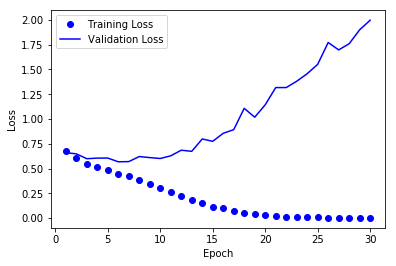

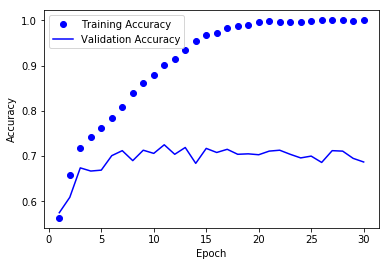

In [28]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

acc = history.history['acc']
val_acc = history.history['val_acc']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.show()